# 추천시스템(推薦system, Recommendation System) 
- 인터넷에서는 항상 정보의 과잉이 일어나고 있음
- 서비스 혹은 기업에서도 정보(아이템 혹은 컨텐츠)의 과잉이 일어나고 있음. 

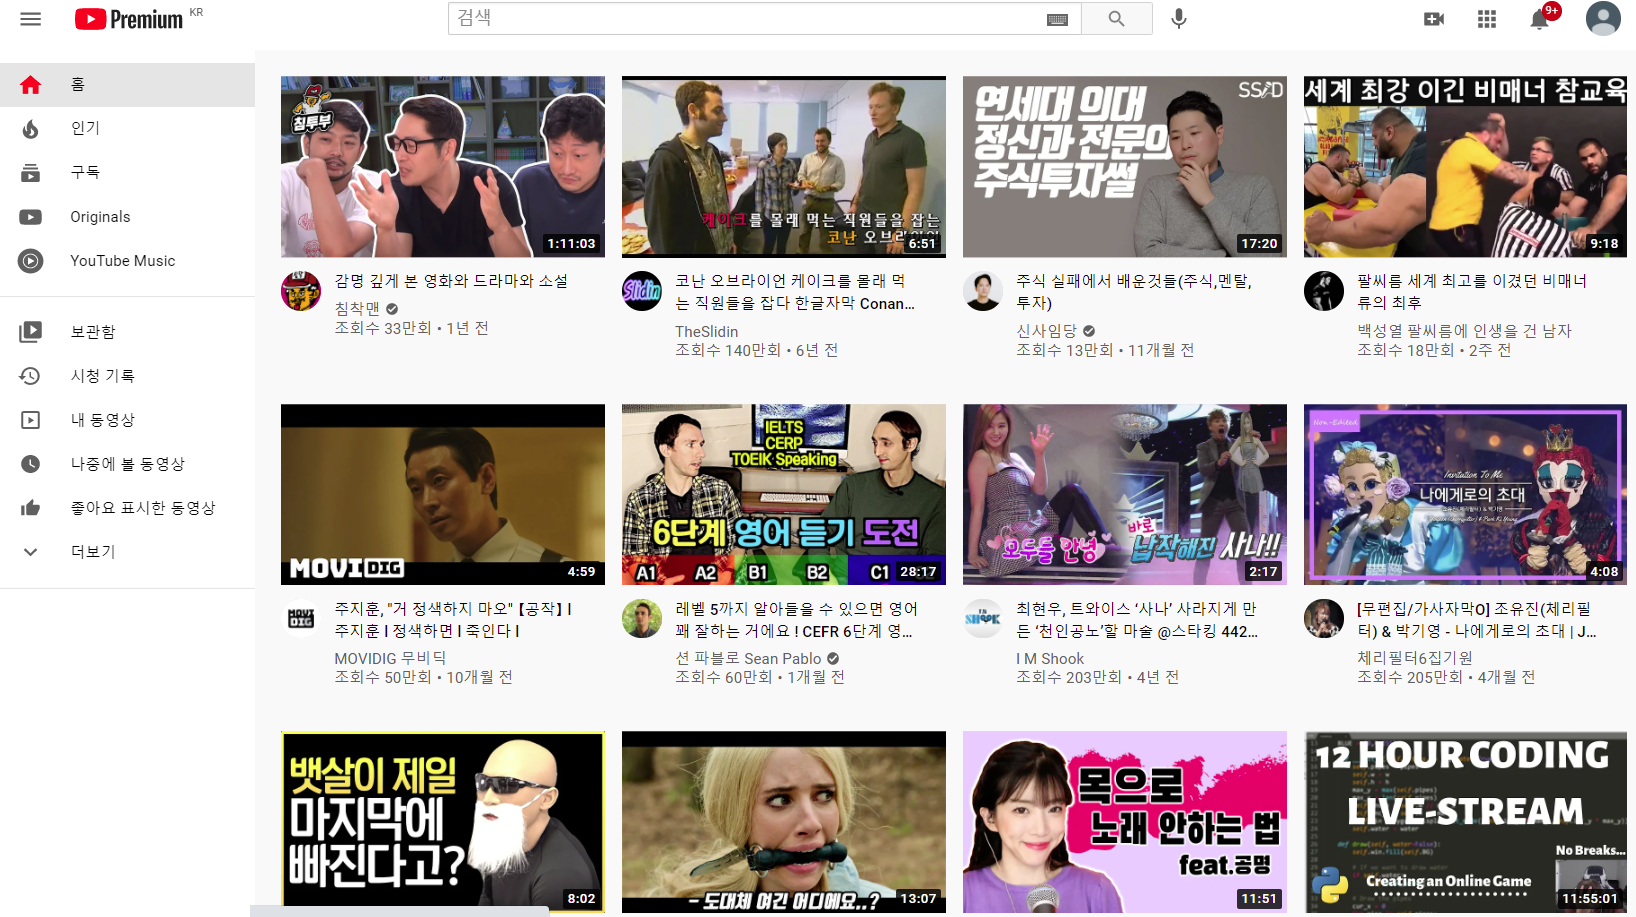

<center> < 유튜브 >

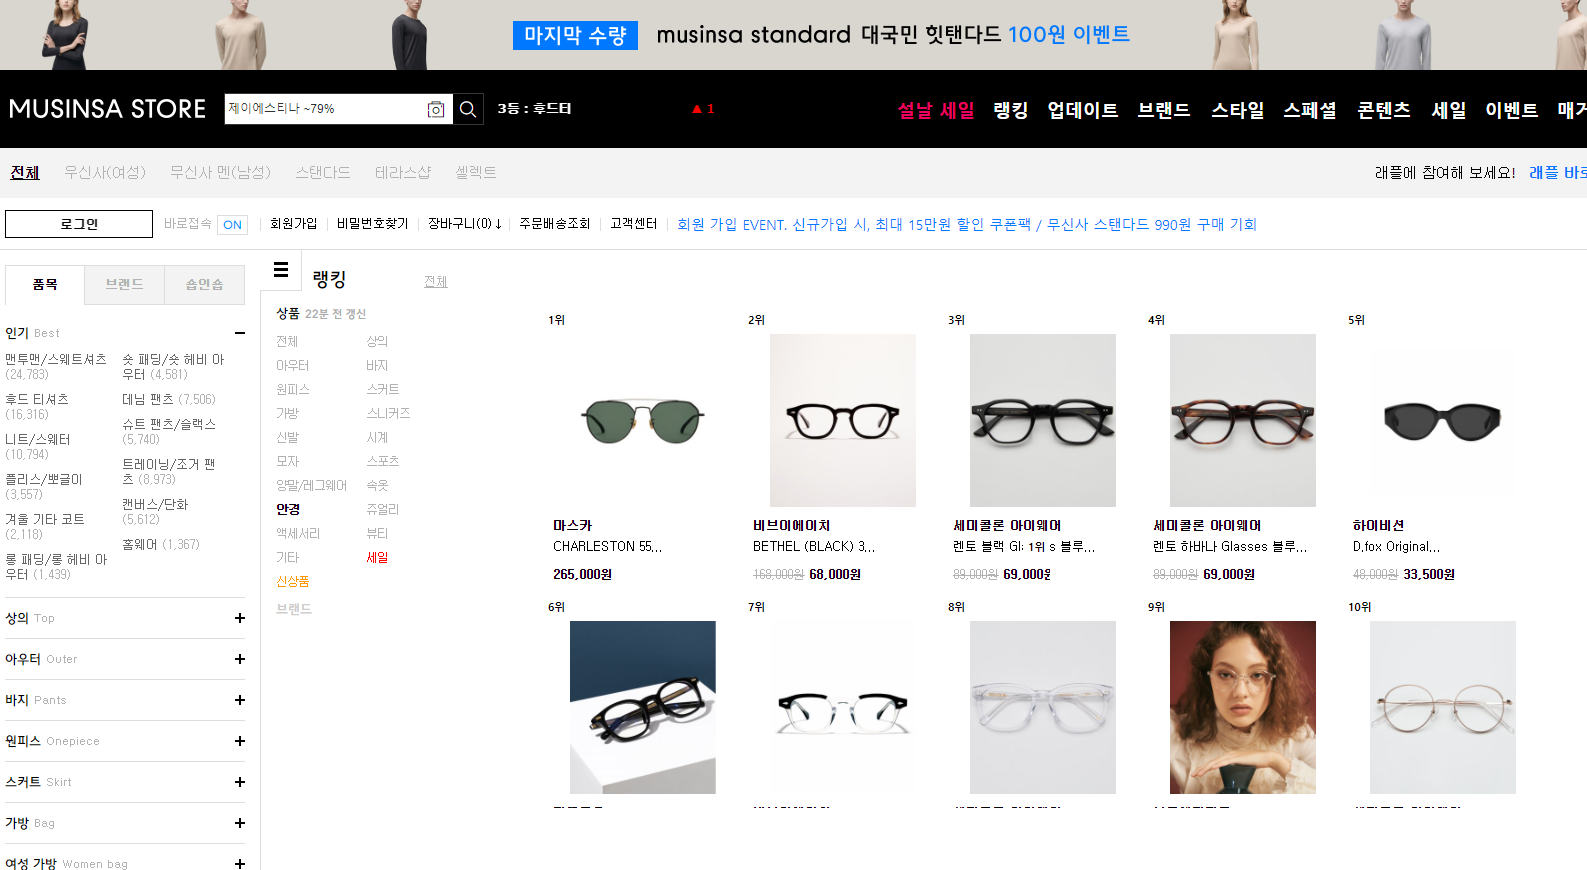

<center> < 무신사 >

### 우리 서비스에 등록된 수 많은 동영상, 수 많은 아이템 중 어느것을 보여주었을 때 가장 좋은 결과로 이어질까?
- 어느 아이템을 보여줬을 때 좀 더 구매가 일어날까? 
- 어느 아이템을 보여줬을 때 좀 더 우리 홈페이지에 머무를까? 
- 이러한 기업들의 고민에서 추천시스템의 니즈가 탄생

# 추천시스템 : 
유저의 선호, 관심사, 행동에 따라 추천하여 정보 과잉 문제를 해결하는 정보 필터링 시스템(Information Filtering System)  

#### 추천시스템의 종류 : 

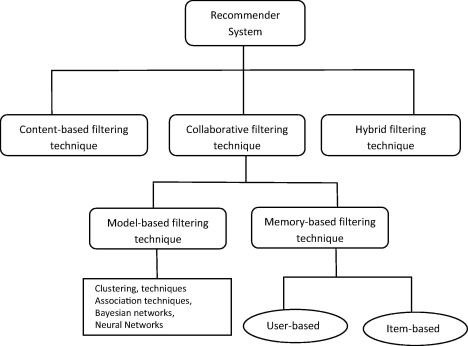

1. 컨텐츠 기반 필터링(Content-based filtering)


- 사용자가 선호하는 컨텐츠와 비슷한 콘텐츠를 추천해주는 시스템
- 이병헌이 출연한 영화를 본 고객에게 이병헌이 출연한 또 다른 영화를 추천해주는 경우

<b> 2. 협업필터링(Collaborative filtering)  </b> 


- 유저-아이템간의 관계에서 작동하는 추천 시스템

2.1 모델 기반 필터링(Model-based filtering technique)
- 머신러닝으로 작동하는 추천시스템

2.1 메모리기반 협업필터링(Memory-based filtering)
- 추천을 위한 데이터를 메모리에 저장해놓고, 추천이 필요할 때마다 데이터를 사용하여 작동하는 시스템

2.1.1 사용자 기반 협업필터링(User-based collaborative filtering)
- 구매패턴이 비슷한 구매자를 기준으로 동일한 제품 추천
- 사용 예 : SNS 친구 추천

2.1.2 아이템 기반 협업필터링(item-based collaborative filtering)
- 아이템과 함께 선호되는 특정 아이템 추천
- 사용 예 : 아마존, 넷플릭스 추천

3. Hybrid filtering technique


- 컨텐츠 기반 필터링과 협업 필터링을 조합한 추천시스템

# 사용자 기반 협업필터링 실습

협업필터링의 기본 가정 : 비슷한 취향을 가진 사람들은 비슷한 아이템을 선택할 것이다.

- UBCF(좌) : 고객이 구매한 상품군과 비슷한 사용자를 찾아서 아이템을 추천  
- IBCF(우) : 고객이 아이템에 준 점수들 중, 유사한 상품을 찾아서 아이템을 추천

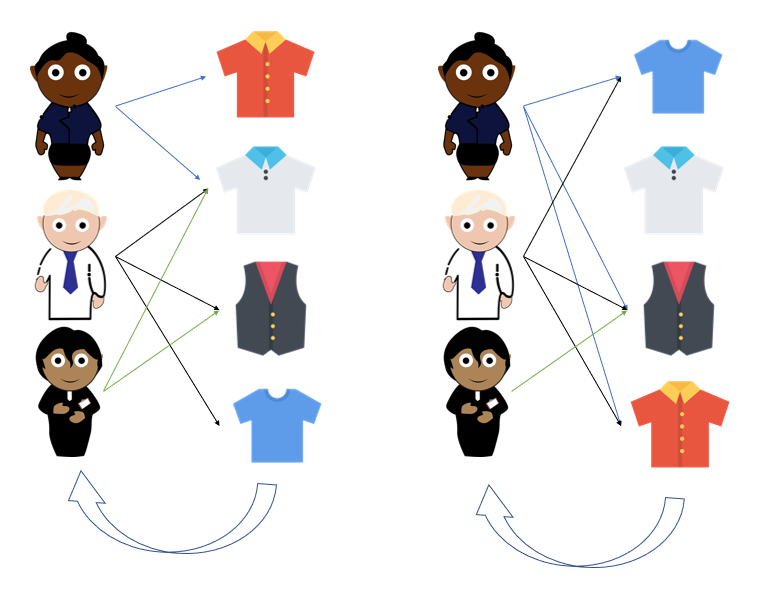

# 협업필터링의 과정 (UBCF)

1. 데이터 처리 


- User-item rating matrix(유저와 아이템 간의 관계 매트릭스) 만들기

In [1]:
import pandas as pd

In [18]:
# 예제 데이터생성
dict_data={"스파이더맨":[3,4,2],"스타워즈":[4,4,1],"기생충":[4,None,1], "노트북":[3,5,4],"러브액츄얼리":[4,4,2]}
df=pd.DataFrame(dict_data,index=['철수','영희','민수'])

In [19]:
# User-item rating matrix
df

,스파이더맨,스타워즈,기생충,노트북,러브액츄얼리
철수,3,4,4.0,3,4
영희,4,4,NaN,5,4
민수,2,1,1.0,4,2


- 철수와 영희가 각 영화들에 매기는 평점이 비슷하고, 영희와 민수를 비교했을 때 영화에 매기는 평점이 비슷하지 않음.
- 그러므로 철수가 기생충이란 영화를 먼저 보고 좋은 평점을 준 것처럼, 영희도 기생충을 보고 좋은 평점을 내릴 것다는 가정
- 이러한 가정으로 UBCF를 진행하게 됨

2. 평가항목이 있는 칼럼만 추출

In [12]:
df=df[['스파이더맨', '스타워즈', '노트북', '러브액츄얼리']]

df.fillna(0,inplace=True)

3. 유사도 지표 사용하기


- 유사한 유저를 추출하는 과정 
- 코사인 유사도 사용
- 코사인 유사도 공식

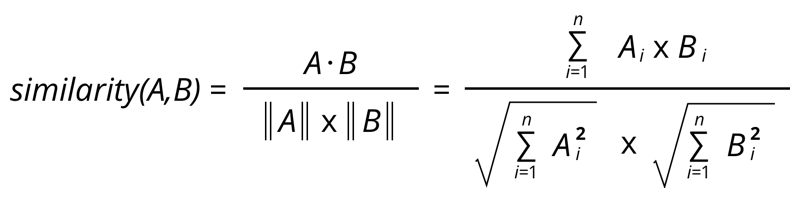

In [13]:
# 코사인 유사도 함수 사용
from sklearn.metrics.pairwise import cosine_similarity

In [14]:
user_similarity=cosine_similarity(df,df)

In [15]:
user_similarity

array([[1.        , 0.97657495, 0.84852814],
       [0.97657495, 1.        , 0.93632918],
       [0.84852814, 0.93632918, 1.        ]])

4. 유사도 산출

In [82]:
user_similarity=pd.DataFrame(user_similarity,index=df.index,columns=df.index)

In [17]:
# 영희 - 철수의 유사도 점수가 0.976575이고,영희 - 민수의 유사도 점수가 0.936329으로 민수보다 철수가 더 유사하다.
# 따라서 기생충에 대해서도 철수처럼 좋은 점수를 줄 것으로 기대하고, 기생충을 추천해줄 수 있다. 
user_similarity

,철수,영희,민수
철수,1.000000,0.976575,0.848528
영희,0.976575,1.000000,0.936329
민수,0.848528,0.936329,1.000000


# 협업필터링 (IBCF)

#### 데이터 다운로드
https://grouplens.org/datasets/movielens/latest/

1. 데이터 처리 


- User-item rating matrix(유저와 아이템 간의 관계 매트릭스) 만들기

In [20]:
import pandas as pd

In [21]:
ratings=pd.read_csv('C:/Users/jungh/lecture/러닝스푼즈/직무부트캠프/ml-latest-small/ratings.csv',encoding='utf-8',engine='python')

In [22]:
movies=pd.read_csv('C:/Users/jungh/lecture/러닝스푼즈/직무부트캠프/ml-latest-small/movies.csv',encoding='utf-8',engine='python')

In [23]:
ratings.drop('timestamp',axis=1,inplace=True)

In [28]:
df_merge=pd.merge(ratings,movies,on='movieId')

In [30]:
user_rating_matrix=df_merge.pivot_table('rating',index='title',columns='userId')

2. 결측치 처리

In [ ]:
user_rating_matrix.fillna(0,inplace=True)

In [37]:
# User-item rating matrix(movie - column 관계)
user_rating_matrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


3. 유사도 지표 사용하기

In [39]:
item_similarity=cosine_similarity(user_rating_matrix)

In [40]:
item_similarity

array([[1.        , 0.        , 0.        , ..., 0.32732684, 0.        ,
        0.        ],
       [0.        , 1.        , 0.70710678, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.70710678, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.32732684, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

4. 유사도 산출

In [60]:
item_similarity=pd.DataFrame(item_similarity,index=user_rating_matrix.index,columns=user_rating_matrix.index)

In [44]:
item_similarity.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.000000,0.000000,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Salem's Lot (2004),0.0,0.000000,0.000000,1.000000,0.857493,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Til There Was You (1997),0.0,0.000000,0.000000,0.857493,1.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [81]:
# 영화 추천하기
item_similarity["'Hellboy': The Seeds of Creation (2004)"].sort_values(ascending=False)[:10]

title
'Hellboy': The Seeds of Creation (2004)                       1.000000
Monsters (2010)                                               1.000000
Space Battleship Yamato (2010)                                1.000000
All the Right Moves (1983)                                    0.780869
Hidden Fortress, The (Kakushi-toride no san-akunin) (1958)    0.747409
...And Justice for All (1979)                                 0.715542
'Round Midnight (1986)                                        0.707107
Kagemusha (1980)                                              0.542720
Sanjuro (Tsubaki Sanjûrô) (1962)                              0.526685
Ghost Rider: Spirit of Vengeance (2012)                       0.525226
Name: 'Hellboy': The Seeds of Creation (2004), dtype: float64